In [1]:
import copy
import networkx as nx
import numpy as np

# Clique detection algorithm

In this notebook we'll implement the clique detection algorithm on a set consisting of 3 complete small graphs. This algorithm is a variant of the subgraph mining algorithm which consist of finding graphs that are isomorphic to a subgraph of another graph.

The problem of finding an isomorphism between two graphs can be reframed as finding two graphs whose canonical label is equal. The canonical label of a graph is a string representation of a graph which is obtained by concatenating the rows of it's adjacency matrix. There are many different labels for a given graph, so the one with the minimum lexicographical order is taken and it's representative of the graph. If another graph has the same canonical label, then they are isomorphic. Thus, the problem of ismorphism is reduced to a string comparison problem. 

First we'll create a set of 3 graphs. Each of these graphs will contain a 3-clique that is common to all. The algorithm should be able to find this 3-clique.

The graphs will be named G, J and H. The first two will contain 4 nodes each and the latter will contain 6 nodes. We'll create them in network-x to visualize them.

In [2]:
clique = [
        ("A", "D"),
        ("A", "R"),
        ("D", "R"),
    ]

In [3]:
# Create G

G = nx.Graph()
edges = [
    ("A", "D"),
    ("A", "R"),
    ("A", "N"),
    ("D", "N"),
    ("D", "R"),
    ("N", "R"),
]

labels = [4, 5, 3, 8, 2, 4]

for ii in range(len(edges)):
    if edges[ii] in clique:
        G.add_edge(edges[ii][0], edges[ii][1], dis=labels[ii], color="red")
    else:
        G.add_edge(edges[ii][0], edges[ii][1], dis=labels[ii], color="black")

assert G.number_of_edges() == (G.number_of_nodes() * (G.number_of_nodes() - 1)) / 2 # Condition for complete graphs

In [6]:
# Create J
# J is very similar to G. The only difference is the label N is replaced by P

J = nx.Graph()
edges = [
    ("A", "D"),
    ("A", "R"),
    ("A", "P"),
    ("D", "P"),
    ("D", "R"),
    ("P", "R"),
]
labels = [4, 5, 3, 8, 2, 4]

for ii in range(len(edges)):
    if edges[ii] in clique:
        J.add_edge(edges[ii][0], edges[ii][1], dis=labels[ii], color="red")
    else:
        J.add_edge(edges[ii][0], edges[ii][1], dis=labels[ii], color="black")

assert J.number_of_edges() == (J.number_of_nodes() * (J.number_of_nodes() - 1)) / 2 # Condition for complete graphs

In [7]:
# Create H
# H is a supergraph of G

H = copy.deepcopy(G)
edges = [
    ("A", "H"),
    ("A", "P"),
    ("D", "H"),
    ("D", "P"),
    ("N", "H"),
    ("N", "P"),
    ("R", "H"),
    ("R", "P"),
    ("H", "P")
]
labels = [4, 5, 3, 5, 6, 2, 8, 7, 4]

for ii in range(len(edges)):
    H.add_edge(edges[ii][0], edges[ii][1], dis=labels[ii], color="black")

assert H.number_of_edges() == (H.number_of_nodes() * (H.number_of_nodes() - 1)) / 2 # Condition for complete graphs

In [8]:
def draw_graph(graph):
    """ Function to draw the graphs and color the 3-clique that all share.
    """
    pos = nx.circular_layout(graph)
    colors = [graph[u][v]["color"] for u,v in graph.edges]
    
    nx.draw(graph, pos, edge_color=colors, with_labels=True)
            

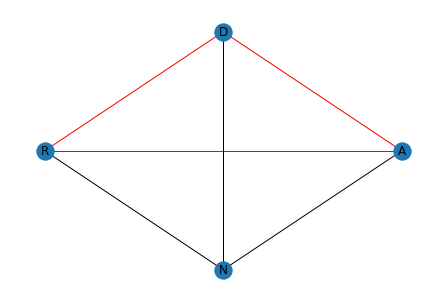

In [9]:
draw_graph(G)

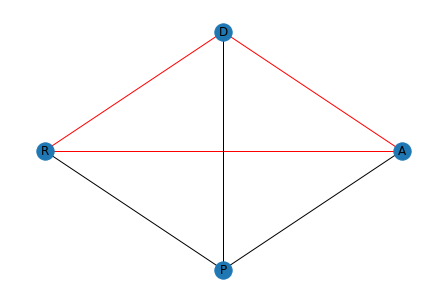

In [10]:
draw_graph(J)

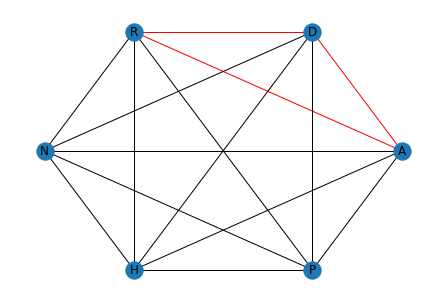

In [11]:
draw_graph(H)